In [ ]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader import data

# For time stamps
from datetime import datetime

In [ ]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN'] #Apple,Google,Microsoft,Amazon

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)
stocks = {}

#For loop for grabbing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    stocks[stock] = data.DataReader(stock,'yahoo',start,end)

In [ ]:
AAPL_df = DataFrame(stocks['AAPL'])

In [ ]:
AAPL_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-07,115.550003,114.129997,114.620003,115.080002,96849000.0,114.344559
2020-10-08,116.400002,114.589996,116.250000,114.970001,83477200.0,114.235260
2020-10-09,117.000000,114.919998,115.279999,116.970001,100506900.0,116.222481
2020-10-12,125.180000,119.279999,120.059998,124.400002,240226800.0,123.604988
2020-10-13,125.389999,119.650002,125.269997,121.099998,262330500.0,120.326088
...,...,...,...,...,...,...
2021-10-01,142.919998,139.110001,141.899994,142.649994,94639600.0,142.649994
2021-10-04,142.210007,138.270004,141.759995,139.139999,98322000.0,139.139999
2021-10-05,142.240005,139.360001,139.490005,141.110001,80861100.0,141.110001


In [ ]:
AAPL_df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,133.243242,130.430039,131.868696,131.864308,9.620607e+07,131.504710
std,11.034769,11.120892,11.096204,11.117079,3.233323e+07,11.283461
min,110.680000,107.320000,109.110001,108.769997,4.639770e+07,108.074875
25%,124.639999,121.519997,123.330002,123.000000,7.478360e+07,122.586334
50%,131.509995,128.759995,130.240005,130.479996,8.994600e+07,130.277893
75%,144.070007,140.410004,142.470001,142.059998,1.115985e+08,142.000000
max,157.259995,154.389999,156.979996,156.690002,2.623305e+08,156.690002


In [ ]:
# General Info
AAPL_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-10-07 to 2021-10-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


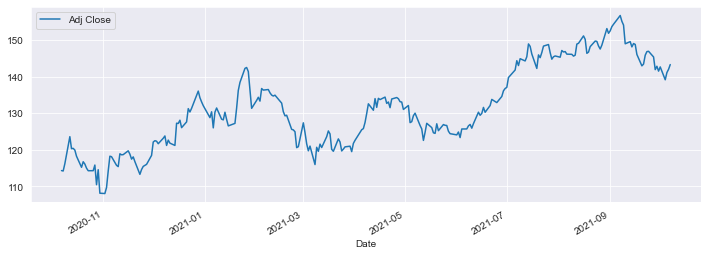

In [ ]:
# Let's see a historical view of the closing price
AAPL_df['Adj Close'].plot(legend=True,figsize=(12,4))

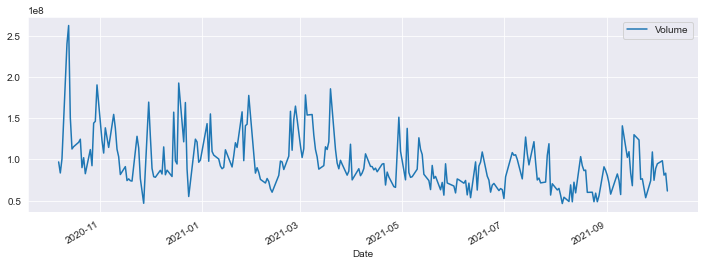

In [ ]:
# Now let's plot the total volume of stock being traded each day over the past 5 years
AAPL_df['Volume'].plot(legend=True,figsize=(12,4))

In [ ]:
# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL_df[column_name] = pd.Series(AAPL_df['Adj Close']).rolling(window=ma).mean()

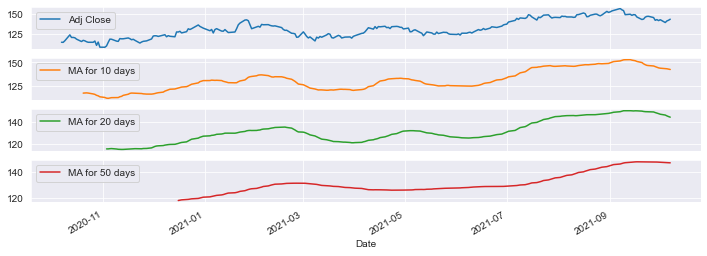

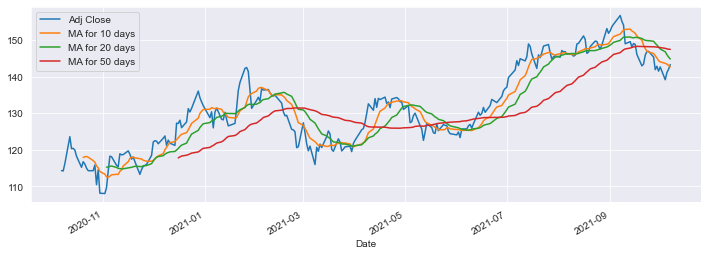

In [ ]:
AAPL_df[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=True,figsize=(12,4))
AAPL_df[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,4))

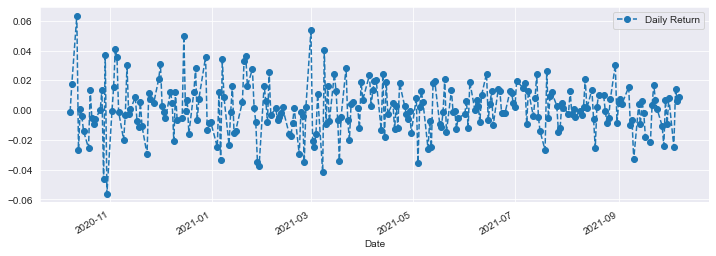

In [ ]:
# We'll use pct_change to find the percent change for each day
AAPL_df['Daily Return'] = AAPL_df['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
AAPL_df['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

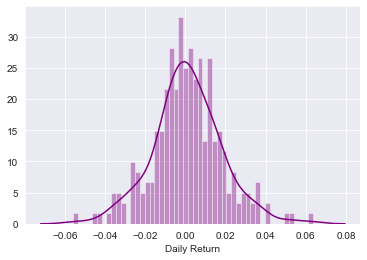

In [ ]:
sns.distplot(AAPL_df['Daily Return'].dropna(),bins=50,color='purple')

In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = data.DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [ ]:
# Let's take a quick look
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-10-07,114.344559,1460.290039,207.922104,3195.689941
2020-10-08,114.235260,1485.930054,208.665298,3190.550049
2020-10-09,116.222481,1515.219971,213.847733,3286.649902
2020-10-12,123.604996,1569.150024,219.386887,3442.929932
2020-10-13,120.326088,1571.680054,220.833618,3443.629883


In [ ]:
tech_rets = closing_df.pct_change()

In [ ]:
tech_rets

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-10-07,NaN,NaN,NaN,NaN
2020-10-08,-0.000956,0.017558,0.003574,-0.001608
2020-10-09,0.017396,0.019712,0.024836,0.030120
2020-10-12,0.063521,0.035592,0.025902,0.047550
2020-10-13,-0.026527,0.001612,0.006594,0.000203
...,...,...,...,...
2021-10-01,0.008127,0.023990,0.025468,-0.000542
2021-10-04,-0.024606,-0.019767,-0.020720,-0.028472
2021-10-05,0.014158,0.018032,0.019957,0.009787


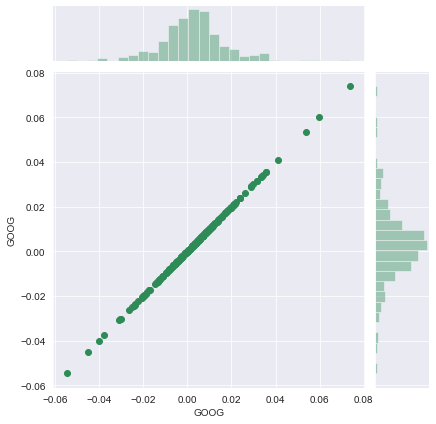

In [ ]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

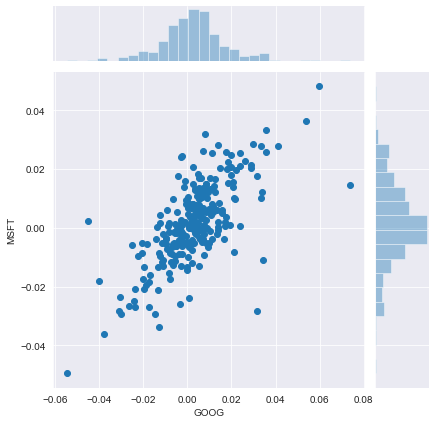

In [ ]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

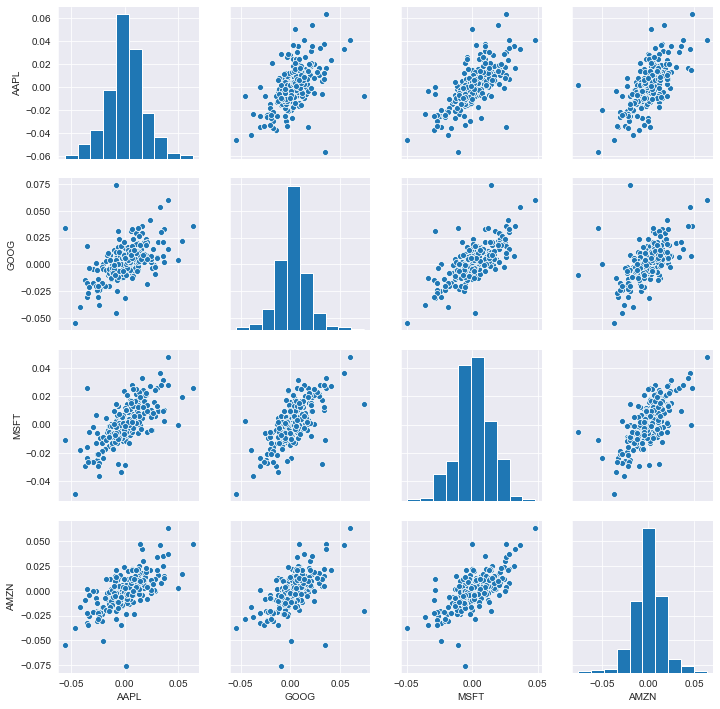

In [ ]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

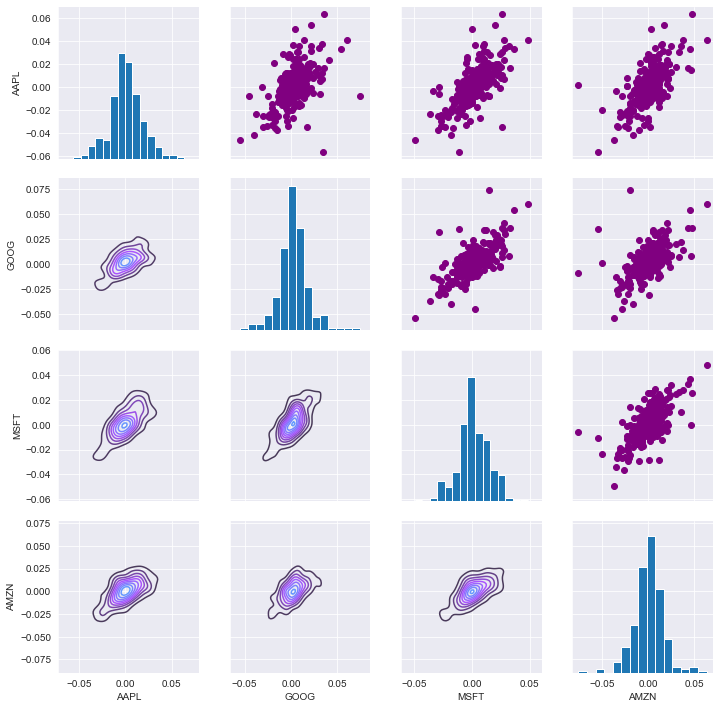

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=15)

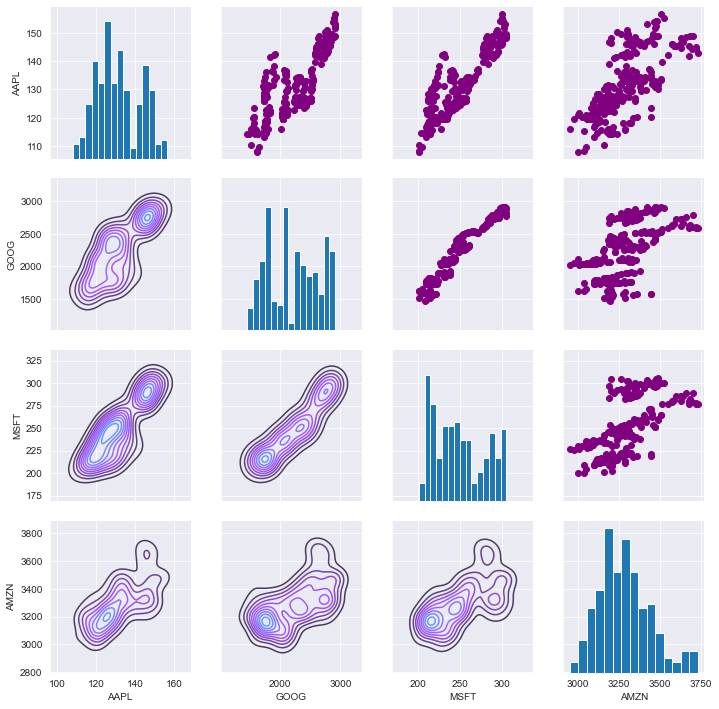

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=15)

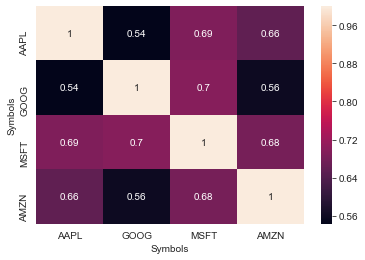

In [ ]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
corr_df = tech_rets.dropna().corr()
sns.heatmap(corr_df,annot=True)

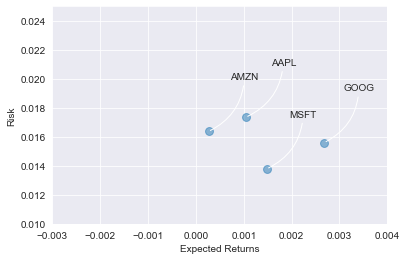

In [ ]:
# Let's start by defining a new DataFrame as a clenaed version of the original tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(),rets.std(),alpha = 0.5,s = area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected Returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done,
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

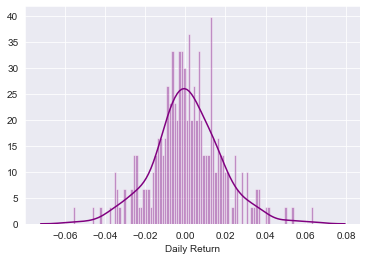

In [ ]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL_df['Daily Return'].dropna(),bins=100,color='purple')

In [ ]:
# The 0.05 empirical quantile of daily returns
rets['AAPL'].quantile(0.05)

-0.026701477153337316

In [ ]:
GOOG = DataFrame(stocks['GOOG'])

In [ ]:
GOOG

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-07,1468.959961,1436.000000,1464.290039,1460.290039,1746200,1460.290039
2020-10-08,1490.000000,1465.089966,1465.089966,1485.930054,1187800,1485.930054
2020-10-09,1516.520020,1489.449951,1494.699951,1515.219971,1435300,1515.219971
2020-10-12,1593.859985,1532.569946,1543.000000,1569.150024,2482600,1569.150024
2020-10-13,1590.000000,1563.199951,1583.729980,1571.680054,1601000,1571.680054
...,...,...,...,...,...,...
2021-10-01,2741.419922,2667.550049,2671.090088,2729.250000,1419400,2729.250000
2021-10-04,2714.000000,2623.330078,2713.989990,2675.300049,1576500,2675.300049
2021-10-05,2747.239990,2680.000000,2680.000000,2723.540039,1206300,2723.540039


In [ ]:
GOOG.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,2245.950089,2205.833248,2223.895337,2227.019129,1.399469e+06,2227.019129
std,416.595714,417.216447,417.997892,417.685517,5.849193e+05,417.685517
min,1468.959961,1436.000000,1464.290039,1460.290039,3.468000e+05,1460.290039
25%,1818.060059,1769.369995,1787.979980,1793.189941,1.030900e+06,1793.189941
50%,2276.601074,2238.465088,2261.090088,2254.790039,1.264000e+06,2254.790039
75%,2612.798096,2578.870117,2596.669922,2595.419922,1.624700e+06,2595.419922
max,2936.409912,2912.290039,2918.989990,2916.840088,4.329100e+06,2916.840088


In [ ]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-10-07 to 2021-10-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    int64  
 5   Adj Close  253 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


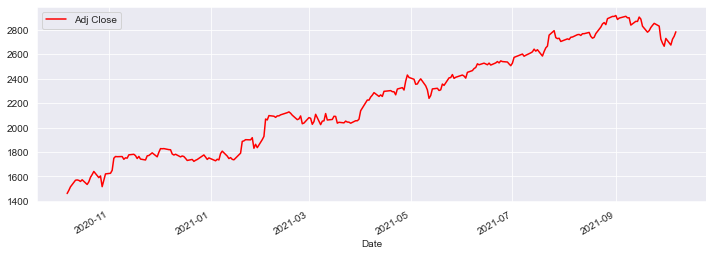

In [ ]:
# Let's see a historical view of the closing price
GOOG['Adj Close'].plot(legend=True,figsize=(12,4),color='red')

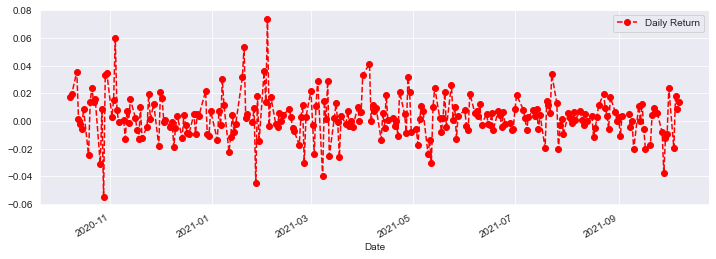

In [ ]:
# We'll use pct_change to find the percent change for each day
GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
GOOG['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o',color='red')

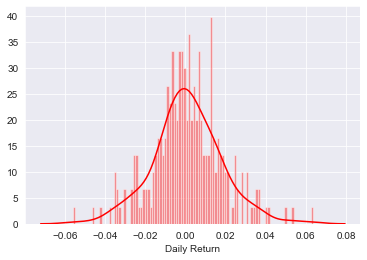

In [ ]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL_df['Daily Return'].dropna(),bins=100,color='red')

In [ ]:
# The 0.05 empirical quantile of daily returns
rets['GOOG'].quantile(0.05)

-0.021439769255119742

In [ ]:
MSFT = DataFrame(stocks['MSFT'])

In [ ]:
MSFT

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-07,210.110001,206.720001,207.059998,209.830002,25681100.0,207.922119
2020-10-08,211.190002,208.320007,210.509995,210.580002,19925800.0,208.665283
2020-10-09,215.860001,211.229996,211.229996,215.809998,26458000.0,213.847717
2020-10-12,223.860001,216.809998,218.789993,221.399994,40461400.0,219.386887
2020-10-13,225.210007,220.429993,222.720001,222.860001,28950800.0,220.833633
...,...,...,...,...,...,...
2021-10-01,289.980011,281.290009,282.119995,289.100006,30086300.0,289.100006
2021-10-04,287.750000,280.250000,287.399994,283.109985,31350700.0,283.109985
2021-10-05,290.399994,284.049988,284.049988,288.760010,24993000.0,288.760010


In [ ]:
MSFT.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,251.634861,247.387115,249.434190,249.656798,2.659126e+07,248.693566
std,29.576070,29.709867,29.707922,29.755612,8.302626e+06,30.285552
min,204.289993,199.619995,203.500000,202.330002,1.055060e+07,200.490311
25%,224.220001,219.679993,222.529999,222.589996,2.146260e+07,220.974640
50%,246.410004,242.899994,245.000000,245.169998,2.495330e+07,244.147766
75%,279.769989,275.320007,278.029999,277.660004,3.048090e+07,277.129456
max,305.839996,302.000000,305.019989,305.220001,6.987060e+07,305.220001


In [ ]:
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-10-07 to 2021-10-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


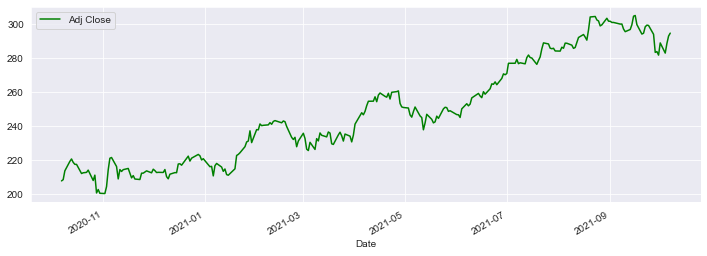

In [ ]:
# Let's see a historical view of the closing price
MSFT['Adj Close'].plot(legend=True,figsize=(12,4),color='green')

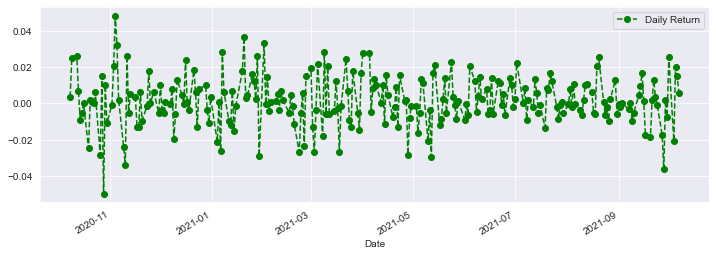

In [ ]:
# We'll use pct_change to find the percent change for each day
MSFT['Daily Return'] = MSFT['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
MSFT['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o',color='green')

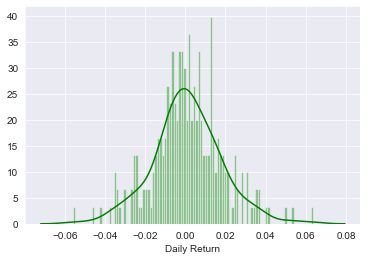

In [ ]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL_df['Daily Return'].dropna(),bins=100,color='green')

In [ ]:
# The 0.05 empirical quantile of daily returns
rets['MSFT'].quantile(0.05)

-0.02375882289909057

In [ ]:
# Set up our time-horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for GOOG
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [ ]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # ShoCk and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for i in range(1,days):
        # Calculate Shock
        shock[i] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[i] = mu * dt
        # Calculate Price
        price[i] = price[i-1] + (price[i-1] * (drift[i] + shock[i]))
        
    return price

In [ ]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close,Daily Return
Date,,,,,,,
2020-10-07,1468.959961,1436.000000,1464.290039,1460.290039,1746200,1460.290039,NaN
2020-10-08,1490.000000,1465.089966,1465.089966,1485.930054,1187800,1485.930054,0.017558
2020-10-09,1516.520020,1489.449951,1494.699951,1515.219971,1435300,1515.219971,0.019712
2020-10-12,1593.859985,1532.569946,1543.000000,1569.150024,2482600,1569.150024,0.035592
2020-10-13,1590.000000,1563.199951,1583.729980,1571.680054,1601000,1571.680054,0.001612


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

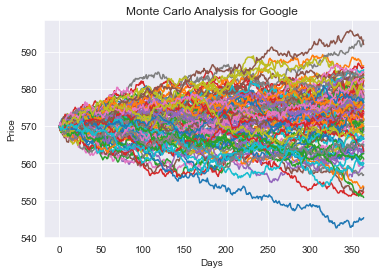

In [ ]:
# Get start price from GOOG.head()
start_price = 569.85

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [ ]:
# Set a large number of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

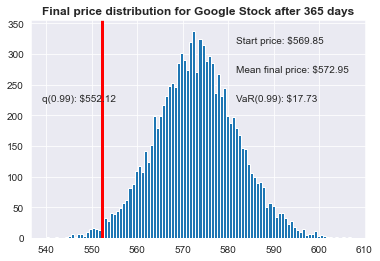

In [ ]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between this
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=100)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))
go_var = start_price - q

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=3, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

In [ ]:
MSFT.head()

,High,Low,Open,Close,Volume,Adj Close,Daily Return
Date,,,,,,,
2020-10-07,210.110001,206.720001,207.059998,209.830002,25681100.0,207.922119,NaN
2020-10-08,211.190002,208.320007,210.509995,210.580002,19925800.0,208.665283,0.003574
2020-10-09,215.860001,211.229996,211.229996,215.809998,26458000.0,213.847717,0.024836
2020-10-12,223.860001,216.809998,218.789993,221.399994,40461400.0,219.386887,0.025902
2020-10-13,225.210007,220.429993,222.720001,222.860001,28950800.0,220.833633,0.006595


Text(0.5, 1.0, 'Monte Carlo Analysis for Microsoft')

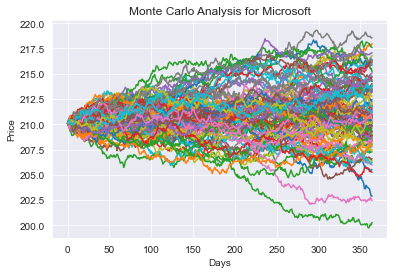

In [ ]:
start_price = 210.11

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Microsoft')

In [ ]:
# Set a large number of runs
runs = 10000

# Create an empty list to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=20)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

In [ ]:
simulations

array([214.44531765, 213.81557765, 213.07980117, ..., 209.71703316,
       213.32434875, 213.54838832])

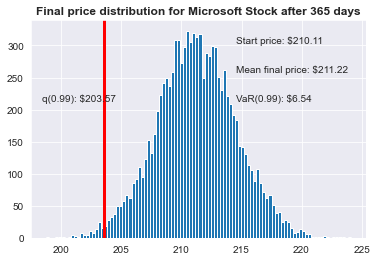

In [ ]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between this
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=100)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))
ms_var = start_price - q

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=3, color='r')

# Title
plt.title(u"Final price distribution for Microsoft Stock after %s days" % days, weight='bold');

In [ ]:
var_df = DataFrame([[go_var,ms_var]])

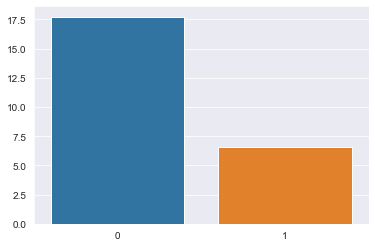

In [ ]:
sns.barplot(data=var_df)